# Sentiment Analysis

## Preparation

In [1]:
import pandas as pd
import numpy as np

## Data loading

In [2]:
df = pd.read_csv("../dataset/sentiment-analysis/Reddit_Data.csv").rename(columns = {"clean_comment":"clean_text"}).append(pd.read_csv("../dataset/sentiment-analysis/Twitter_Data.csv"))
df.head()

,clean_text,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0


#Preprocess

In [3]:
#Transforming the clean text as string type
df = df.astype({'clean_text': str})
df.head()

,clean_text,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0


In [4]:
#Checking if there is Null in the dataframe
df.isnull().any()

clean_text    False
category       True
dtype: bool

In [5]:
#Showing the Null data
df[df['category'].isnull()]

,clean_text,category
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [6]:
#Removing the null
df.dropna(inplace=True)

Counting word count

In [7]:
import nltk
nltk.download('punkt')
df['token'] = df['clean_text'].apply(nltk.tokenize.word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
df['len'] = df['token'].apply(len)

In [9]:
df.len

0          39
1         196
2          86
3          29
4         112
         ... 
162975     18
162976     36
162977      9
162978     13
162979     34
Name: len, Length: 200222, dtype: int64

In [10]:
df['len'].describe()

count    200222.000000
mean         21.931296
std          26.686952
min           0.000000
25%          10.000000
50%          18.000000
75%          30.000000
max        1307.000000
Name: len, dtype: float64

In [11]:
df[df['len'] > 1000].sort_values('len')

,clean_text,category,token,len
1682,going churlish and ahead and puncture your ba...,1.0,"[going, churlish, and, ahead, and, puncture, y...",1003
6016,the reason very simple copy and paste from red...,1.0,"[the, reason, very, simple, copy, and, paste, ...",1006
29923,india pakistan html for the past few decades ...,1.0,"[india, pakistan, html, for, the, past, few, d...",1009
24431,modi’ government last four years has recovere...,1.0,"[modi, ’, government, last, four, years, has, ...",1035
4184,too much dependence people from iit and iim ca...,1.0,"[too, much, dependence, people, from, iit, and...",1054
10440,demonetisation fails then blame modi told cab...,1.0,"[demonetisation, fails, then, blame, modi, tol...",1084
20979,there redemption for the crimes committed agai...,1.0,"[there, redemption, for, the, crimes, committe...",1103
7231,let one one food beef obviously same thing her...,1.0,"[let, one, one, food, beef, obviously, same, t...",1119
4373,part you have something mind please let know c...,1.0,"[part, you, have, something, mind, please, let...",1177
28490,first all extremely sad people misunderstood y...,1.0,"[first, all, extremely, sad, people, misunders...",1181


In [12]:
df['clean_text'].iloc[8646]

'brilliant point point breakdown one other argument making the rounds false argument okay maybe the strikes took place but should have been kept secret and deniable there good reason for dgmo make statements about covert actions except for bjp score political points there are massive number reasons make strike like this public exposes pakistan bluster just tough talk for all their talk being high alert for indian troop movement along the loc after the uri attack they didn even see coming massively boosts morale within the armed forces morale which has been getting steadily lower our bases kept getting hit while they were not allowed take charge the offensive the troops are also being vilified the media national and international while trying control spiral violence srinagar fueled pakistan propaganda machine makes the best use pakistan blunder overreaching and outmaneuvers them pakistan has its hands tied now after making bold statements about defending against indian adventurism aggre

In [13]:
# df['label'] = df['category'].map({
#     -1.0: np.array([1, 0, 0], dtype=float),
#     0.0: np.array([0, 1, 0], dtype=float),
#     1.0: np.array([0, 0, 1], dtype=float)
# })
# df.drop('label', axis=1)
df['label'] = df['category'].map({
    -1.0: [1, 0, 0],
    0.0: [0, 1, 0],
    1.0: [0, 0, 1]
})

In [14]:
df.head()

,clean_text,category,token,len,label
0,family mormon have never tried explain them t...,1.0,"[family, mormon, have, never, tried, explain, ...",39,"[0, 0, 1]"
1,buddhism has very much lot compatible with chr...,1.0,"[buddhism, has, very, much, lot, compatible, w...",196,"[0, 0, 1]"
2,seriously don say thing first all they won get...,-1.0,"[seriously, don, say, thing, first, all, they,...",86,"[1, 0, 0]"
3,what you have learned yours and only yours wha...,0.0,"[what, you, have, learned, yours, and, only, y...",29,"[0, 1, 0]"
4,for your own benefit you may want read living ...,1.0,"[for, your, own, benefit, you, may, want, read...",112,"[0, 0, 1]"


#Split the data

In [15]:
sample = df.sample(frac=1.0, random_state=4)
train = sample[:int(0.8*len(sample))]
test = sample[int(0.8*len(sample)):]

In [16]:
# Tokenizer

In [17]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train['clean_text'].values)


In [18]:
# print(len(tokenizer.word_index))
# len(tokenizer.word_index)**0.25


In [19]:
# a = "I remember it all too well"
# tokenizer.texts_to_sequences([a])

In [20]:
sequence_train = tokenizer.texts_to_sequences(train["clean_text"])
sequence_test = tokenizer.texts_to_sequences(test["clean_text"])

In [23]:
pad_train= tf.keras.preprocessing.sequence.pad_sequences(sequence_train, maxlen=30, padding='pre')
pad_test= tf.keras.preprocessing.sequence.pad_sequences(sequence_test, maxlen=30, padding='pre')


RNN

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#hidden and output layer
model = keras.Sequential(
    [
     tf.keras.layers.Embedding(len(tokenizer.word_index)+1,64,input_length=30, trainable=True), #total vocab, output (dari total vocab akar 4)
     layers.LSTM(64, return_sequences=True), #hidden layer
     layers.LSTM(64), #hidden layer
     # layers.LSTM(64, return_sequences=True), #hidden layer
     # layers.LSTM(64, return_sequences=True), #hidden layer
     # layers.LSTM(64), #hidden layer
     # layers.Dense(64, activation=tf.nn.relu),
     layers.Dense(64, activation=tf.nn.relu),
     # layers.Dense(3, activation ="softmax", name="layer3") #output layer
     layers.Dense(3, activation ="softmax", name="layer3") #output layer
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            7747072   
                                                                 
 lstm (LSTM)                 (None, 50, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 layer3 (Dense)              (None, 3)                 195       
                                                                 
Total params: 7,817,475
Trainable params: 7,817,475
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
________________________

Compile the model

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy" , metrics=['categorical_accuracy'])
# model.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy" , metrics=['accuracy'])

Fit the model

In [26]:
history = model.fit(x=pad_train, y=pd.get_dummies(train['category']), batch_size=32, epochs=100, verbose=1,
    validation_data=[pad_test,pd.get_dummies(test['category'])],
          steps_per_epoch=32)

Epoch 1/100
32/32 [==============================] - 15s 284ms/step - loss: 1.0274 - categorical_accuracy: 0.4922 - val_loss: 0.9829 - val_categorical_accuracy: 0.5263
Epoch 2/100
32/32 [==============================] - 8s 257ms/step - loss: 0.9818 - categorical_accuracy: 0.5234 - val_loss: 0.9836 - val_categorical_accuracy: 0.5360
Epoch 3/100
32/32 [==============================] - 8s 250ms/step - loss: 0.9503 - categorical_accuracy: 0.5498 - val_loss: 0.9475 - val_categorical_accuracy: 0.5619
Epoch 4/100
32/32 [==============================] - 8s 249ms/step - loss: 0.9033 - categorical_accuracy: 0.5908 - val_loss: 0.8764 - val_categorical_accuracy: 0.5930
Epoch 5/100
32/32 [==============================] - 8s 251ms/step - loss: 0.8240 - categorical_accuracy: 0.6338 - val_loss: 0.8160 - val_categorical_accuracy: 0.6353
Epoch 6/100
32/32 [==============================] - 8s 244ms/step - loss: 0.7769 - categorical_accuracy: 0.6748 - val_loss: 0.7373 - val_categorical_accuracy: 0.67

In [29]:
model.evaluate(pad_test,pd.get_dummies(test['category']))

1252/1252 [==============================] - 10s 8ms/step - loss: 0.2022 - categorical_accuracy: 0.9368


[0.20218756794929504, 0.9367961287498474]

In [30]:
model.save('../model/sentiment-model')

INFO:tensorflow:Assets written to: ../model/sentiment-model\assets


INFO:tensorflow:Assets written to: ../model/sentiment-model\assets


In [ ]:
# !zip -r sentiment.zip 'Sentiment Model'

updating: Sentiment Model/ (stored 0%)
updating: Sentiment Model/variables/ (stored 0%)
updating: Sentiment Model/variables/variables.index (deflated 67%)
updating: Sentiment Model/variables/variables.data-00000-of-00001 (deflated 36%)
updating: Sentiment Model/assets/ (stored 0%)
updating: Sentiment Model/saved_model.pb (deflated 91%)
updating: Sentiment Model/keras_metadata.pb (deflated 90%)


Test the model

In [31]:
prediction = model.predict(pad_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true = pd.get_dummies(test['category']), y_pred = prediction.round())

0.9318516668747658

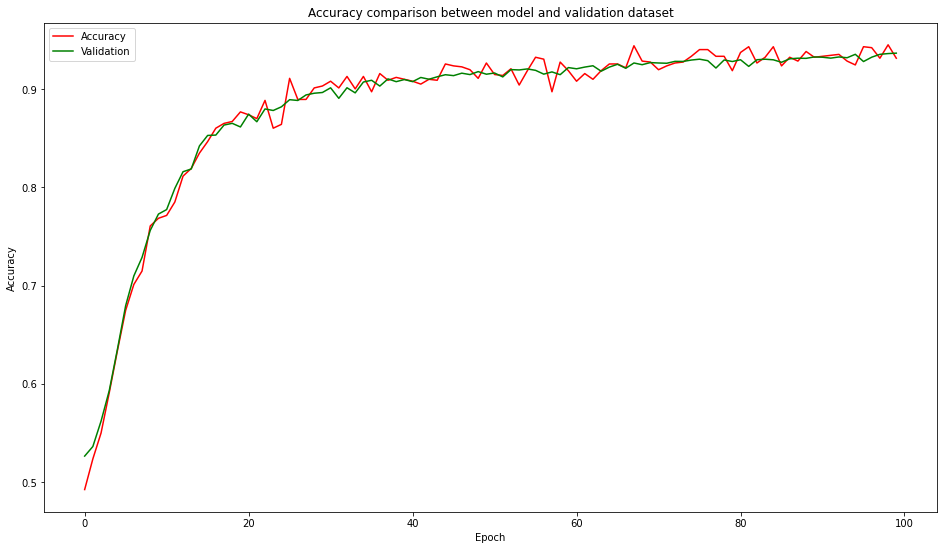

In [35]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 9))

plt.plot(range(len(history.history['categorical_accuracy'])),(history.history['categorical_accuracy']), 'r', label="Accuracy")
plt.plot(range(len(history.history['categorical_accuracy'])),(history.history['val_categorical_accuracy']), 'g',label="Validation")
plt.title('Accuracy comparison between model and validation dataset')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.show()

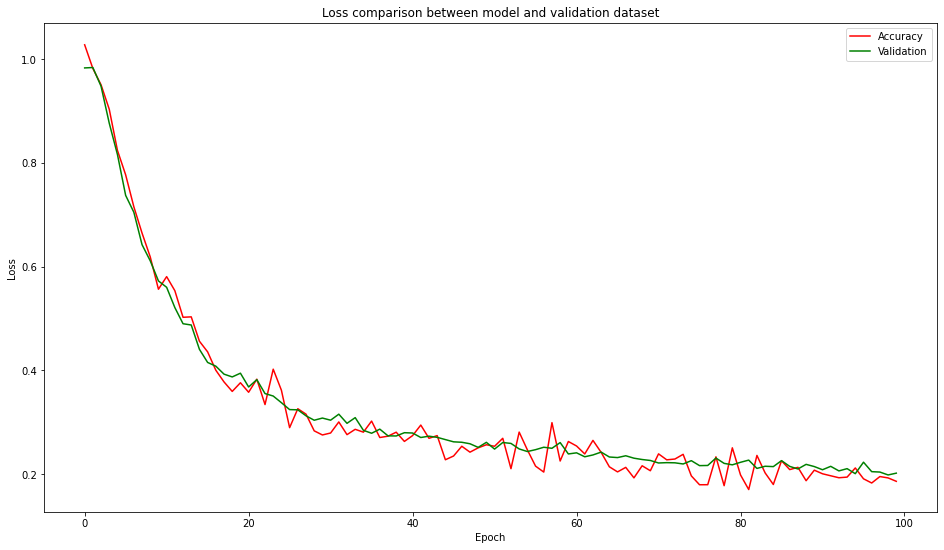

In [36]:
plt.figure(figsize=(16,9))

plt.plot(range(len(history.history['categorical_accuracy'])),(history.history['loss']), 'r', label="Accuracy")
plt.plot(range(len(history.history['categorical_accuracy'])),(history.history['val_loss']), 'g',label="Validation")
plt.title('Loss comparison between model and validation dataset')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

plt.show()

In [41]:
df2 =pd.read_excel("../dataset/tweet-sample.xlsx")
df2.head()

,raw_text,label
0,S.o.n.k.o: No better time to die.,0
1,Ok enough Arcane. Let me just go to the store ...,0
2,I just want to lay in bed with my person (or s...,1
3,Shang chi is wickedddd even better than i expe...,1
4,Nice kiss in #Arcane https://t.co/627r0DHBB8 - ✍,1


In [42]:
real_x = df2["raw_text"]
real_y = pd.get_dummies(df2['label'])

In [43]:
real_x = tokenizer.texts_to_sequences(real_x)
print(real_x)

[[1, 1, 1, 1, 1, 1, 148, 47, 1, 1352], [1, 306, 1, 174, 1, 36, 1, 1, 2, 4851, 4, 7062, 1, 1, 1], [1, 36, 80, 1, 5428, 1, 4567, 13, 1, 205, 1, 295, 1, 4, 225, 1, 47, 1, 1352, 178, 23584, 77, 6890], [1, 5946, 1, 1, 48, 148, 74, 1, 1024, 1, 170, 223, 11360, 1, 19, 10986, 2, 334, 1, 1185, 2464, 1, 20218], [729, 10554, 1, 1, 7062, 1, 1, 1, 70972], [1, 8, 4688, 264, 1, 34327, 1, 7062, 1, 1, 1], [752, 408, 5, 8, 15, 22851, 1, 87716, 1, 7062, 1, 1, 1], [1, 1498, 16493, 1, 7062, 1, 1, 1], [1466, 1, 6858, 1, 18734, 31074, 44076, 20, 2, 55821, 126, 3868, 7, 344, 1, 1, 9154, 42, 913, 1, 1498, 16493, 126, 1, 196, 1, 1, 7062, 1, 1, 1], [1, 3595, 1, 11939, 1, 986, 1, 32, 24, 1, 19, 26, 1, 81, 105548, 4174, 1, 15118], [41, 1, 1, 87947, 527, 308, 10, 1, 2, 1441, 6160, 1755, 1, 1030, 1128, 1, 36, 1, 1185], [5371, 1, 16331, 1, 971, 2297, 1676, 1, 1, 1, 1, 1, 169, 14, 5, 51, 1, 1498, 16493, 1676, 2404, 61, 7062, 1, 1, 1, 7062, 1, 1, 1], [1, 6312, 190, 1], [1, 1, 3619, 1, 1, 5946, 4, 2, 5504, 1, 2, 2812, 1

In [44]:
real_x = tf.keras.preprocessing.sequence.pad_sequences(real_x, maxlen=30, padding='pre')
print(real_x)

[[    0     0     0 ...    47     1  1352]
 [    0     0     0 ...     1     1     1]
 [    0     0     0 ... 23584    77  6890]
 ...
 [    0     0     0 ...     1     1     1]
 [    0     0     0 ...     1     1     1]
 [    0     0     0 ... 11093    19  7321]]


In [62]:
real_y_pred = model.predict(real_x, verbose=1)

7/7 [==============================] - 0s 12ms/step


In [63]:
print(real_y_pred)

[[1.03136248e-04 4.85147146e-04 9.99411702e-01]
 [7.26696244e-03 9.79101539e-01 1.36314435e-02]
 [6.21521054e-03 9.56946552e-01 3.68381888e-02]
 [1.43479891e-04 8.63575260e-05 9.99770224e-01]
 [2.58895278e-04 9.59550962e-04 9.98781502e-01]
 [1.38705736e-03 7.83432182e-03 9.90778685e-01]
 [5.23600914e-03 9.87384558e-01 7.37940473e-03]
 [4.57771216e-03 9.90250468e-01 5.17171994e-03]
 [2.27756619e-01 4.99334991e-01 2.72908330e-01]
 [5.92462299e-03 9.78526473e-01 1.55489082e-02]
 [7.66576350e-01 1.28673792e-01 1.04749903e-01]
 [2.27944255e-01 5.04786789e-01 2.67268956e-01]
 [2.20896071e-03 9.94867444e-01 2.92353565e-03]
 [9.97414626e-03 9.68940794e-01 2.10850947e-02]
 [6.42827072e-05 2.33463652e-04 9.99702275e-01]
 [6.18180726e-04 4.05774917e-03 9.95324075e-01]
 [8.79556477e-01 1.30936224e-02 1.07349873e-01]
 [7.95319498e-01 4.60548960e-02 1.58625573e-01]
 [5.72544755e-03 9.84620035e-01 9.65455081e-03]
 [5.22449845e-03 1.45944313e-03 9.93316114e-01]
 [1.03508480e-01 2.24468000e-02 8.740446

In [64]:
real_y_pred = pd.DataFrame((real_y_pred ==real_y_pred.max(axis=1)[:,None]).astype(int)).rename({
    0: -1,
    1: 0,
    2: 1
}, axis=1)
real_y_pred

,-1,0,1
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
195,0,1,0
196,0,0,1
197,0,0,1
198,0,0,1


Accuracy from Twitter data

In [66]:
accuracy_score(y_true = pd.get_dummies(df2['label']), y_pred = real_y_pred)

0.55

In [69]:
real_y_pred.sum()

-1    31
 0    71
 1    98
dtype: int64

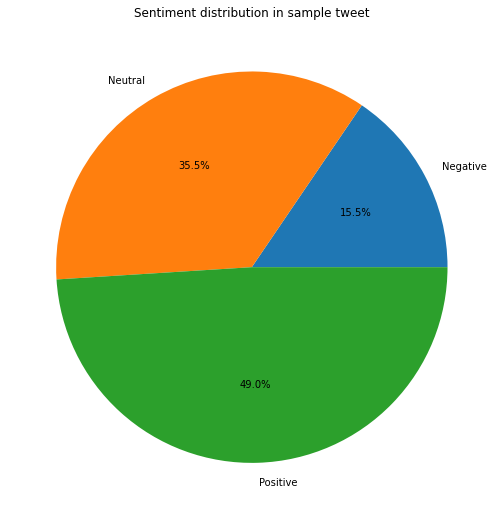

In [78]:
plt.figure(figsize=(9, 9))
plt.pie(
    real_y_pred.sum(),
    labels=[
        'Negative',
        'Neutral',
        'Positive'
    ],
    autopct='%1.1f%%'
)
plt.title('Sentiment distribution in sample tweet')
plt.show()

## Spread of sentiment in tweets about Squid Game

In [80]:
squid_df = pd.read_json('../dataset/movie-tweets/squid game.json', orient='index')['inferred_text']
squid_df.head()

0    bringing back jungwon's cute and tiny reaction...
1    Living in North Korea is like LITTERALLY playi...
2    Variety | Squid Game's Jung Hoyeon and Park Ha...
3    WE RECREATED SQUID GAME WITH 456 RANDOM PEOPLE...
4    wouldnt last one round in squid game https://t...
Name: inferred_text, dtype: object

In [81]:
squid_seq = tokenizer.texts_to_sequences(squid_df)
squid_seq

[[1361,
  101,
  1,
  4466,
  4,
  5105,
  1994,
  42,
  1,
  84,
  1,
  1,
  225,
  87947,
  527,
  455,
  69,
  1,
  2,
  1174,
  7723,
  1,
  3283,
  1,
  1,
  7062,
  1,
  1,
  1],
 [704,
  1,
  742,
  3283,
  1,
  26,
  1,
  811,
  87947,
  527,
  155,
  15680,
  1,
  2,
  5416,
  5996,
  5,
  1235,
  87947,
  527,
  7062,
  1,
  1,
  1],
 [5748,
  87947,
  1,
  20322,
  1,
  4,
  4418,
  13565,
  6047,
  2187,
  32,
  36993,
  41084,
  1,
  1,
  363,
  17,
  9,
  1598,
  1,
  36993,
  7062,
  1,
  1,
  1,
  7062,
  1,
  1,
  1],
 [1, 46591, 87947, 527, 13, 6001, 2928, 23, 1, 225],
 [1990, 130, 34, 2317, 1, 87947, 527, 7062, 1, 1, 1],
 [2,
  42503,
  292,
  1,
  155,
  111,
  15680,
  1,
  821,
  5,
  16939,
  1,
  1,
  87947,
  527,
  158,
  742,
  3283,
  4,
  1,
  11093,
  9007,
  21,
  177,
  12905,
  1,
  87947,
  527,
  695,
  23,
  1,
  89,
  1,
  573,
  32,
  7453,
  1198,
  126,
  904,
  462,
  37,
  3774],
 [25,
  11,
  151,
  87947,
  527,
  1,
  2,
  1636,
  2668,
  1,

In [83]:
squid_pad = tf.keras.preprocessing.sequence.pad_sequences(squid_seq, maxlen=30)
squid_pad

array([[    0,  1361,   101, ...,     1,     1,     1],
       [    0,     0,     0, ...,     1,     1,     1],
       [    0,  5748, 87947, ...,     1,     1,     1],
       ...,
       [    0,     0,     0, ...,     1,     1,     1],
       [    0,     0,     0, ...,   308,   455,   510],
       [    0,     0,     0, ...,   308,    19,  1164]])

In [84]:
squid_pred = model.predict(squid_pad)
squid_pred

array([[0.20836587, 0.0372365 , 0.75439763],
       [0.97715616, 0.00347976, 0.01936404],
       [0.20346959, 0.54432476, 0.25220567],
       ...,
       [0.9894426 , 0.00163585, 0.00892158],
       [0.9795399 , 0.0081644 , 0.01229583],
       [0.05393168, 0.03466827, 0.9114    ]], dtype=float32)

In [85]:
squid_pred = pd.DataFrame((squid_pred ==squid_pred.max(axis=1)[:,None]).astype(int)).rename({
    0: -1,
    1: 0,
    2: 1
}, axis=1)

In [86]:
squid_pred.head()

,-1,0,1
0,0,0,1
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


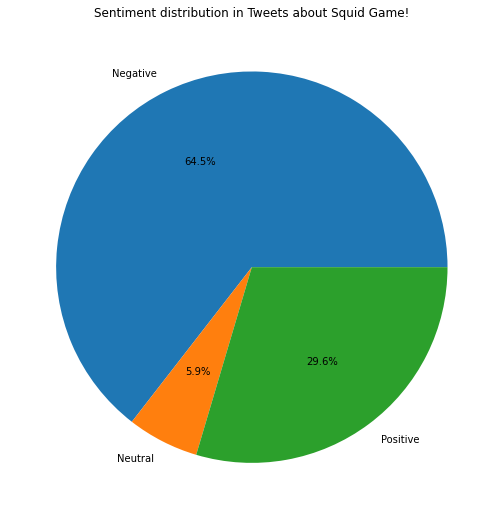

In [87]:
plt.figure(figsize=(9, 9))
plt.pie(
    squid_pred.sum(),
    labels=[
        'Negative',
        'Neutral',
        'Positive'
    ],
    autopct='%1.1f%%'
)
plt.title('Sentiment distribution in Tweets about Squid Game!')
plt.show()

In [97]:
for i in squid_pred[squid_pred[-1] == 1].index:
    print(squid_df.iloc[i])

Living in North Korea is like LITTERALLY playing Squid Game
MAN SENTENCED TO THE FIRING SQUAD FOR SELLING SQUID GAME. 
https://t.co/KoZUYUiI2W
WE RECREATED SQUID GAME WITH 456 RANDOM PEOPLE, GO WATCH!
wouldnt last one round in squid game https://t.co/D7sUhr3XS7
Give me likes for squid game https://t.co/DZiBUQbphC
Yo I'm live 

WATCHING MR BEAST SQUID GAME VIDEO 

https://t.co/sb2Otf172m 
https://t.co/sb2Otf172m 
https://t.co/sb2Otf172m https://t.co/CwYswXSihd
at home after my night shift at the samsung 삼성전자 squid game theme park (visitors get to dress up in pink jumpsuits and shoot me). my paycheck arrives (25x25 px corner of a poorly drawn ape nft) i almost have the whole jpeg.  i open a drawer inside is a gun. i close the drawer
@radiogreenman Another victim vanquished in the "squid game"😂😂😂😂
Feels like we've started a new era of YouTube

Before MrBeast Squid Game and after MrBeast Squid Game
I finished making all 456 wireless explosive charges for MrBeast's Squid Game. Go watch it!!